# Lesson 4
## Image Classification
##### going deeper into deeplearning stuffs

In [2]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)

In [123]:
from utils import *

In [25]:
print('total data', len((path/'images').ls()))
print("total classes", len((path/'annotations').ls()))


total data 7393
total classes 7


In [32]:
# we need to extract pets names from file name

fname_sample = (path/'images').ls()[0]
fname_sample.name

'Russian_Blue_242.jpg'

In [29]:
re.findall(r'(.+)_\d+.jpg$', fname_sample.name)

['Russian_Blue']

In [58]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=.75)
)

dls = pets.dataloaders(path/'images')

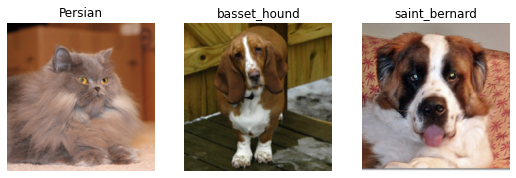

In [62]:
dls.valid.show_batch(max_n=3)

In [72]:
# dblock1 = DataBlock(blocks = (ImageBlock(), CategoryBlock()),
#                     get_y = parent_label,
#                     item_tfms= Resize(460),
#                    )

# dls1 = dblock1.dataloaders([(Path.cwd()/'datasets/bears/grizzly/00000171.jpg')] * 100, bs = 8)

# dls1.train.get_idxs = lambda: Inf.ones
# x, y = dls1.valid.one_batch()




### Checking and Debugging a DataBlock

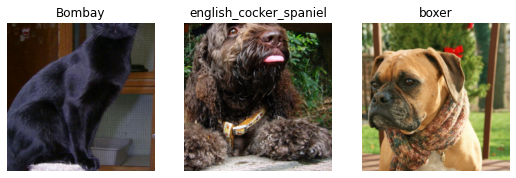

In [90]:
# step 1 check data

dls.show_batch(nrows=1, ncols=3)

In [92]:
# step 2 using Summary method

pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                     get_items = get_image_files,
                     splitter =  RandomSplitter(seed = 42),
                     get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name')
                 )
pets1.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/beagle_58.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=334x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/beagle_58.jpg
    applying partial gives
      beagle
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(15)

Final sample: (PILImage mode=RGB size=334x500, TensorCategory(15))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: 

RuntimeError: stack expects each tensor to be equal size, but got [3, 500, 334] at entry 0 and [3, 500, 333] at entry 1

In [94]:
learn =  cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.526970,0.353837,0.115020,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.494924,0.311876,0.096076,01:00
1,0.324844,0.242044,0.082544,01:00


In [138]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

## Cross-entropy Loss

In [95]:
x, y = dls.one_batch()

In [142]:
dls.vocab[14]

'basset_hound'

In [96]:
y

TensorCategory([14,  7, 11, 30, 36, 34,  2, 23, 30, 32, 34,  7, 31, 36, 12, 22, 21, 13,
        20, 16, 15, 24, 23, 22, 10,  9, 26, 31, 10, 12, 10, 20, 11,  1, 25,  4,
         1, 34, 32,  4, 25,  6, 32,  1, 29, 21,  0, 27, 31, 16,  0,  3, 30, 22,
         7, 33, 14,  2, 12, 15,  9, 29, 11,  9], device='cuda:0')

In [144]:
preds, _ = learn.get_preds(dl = [dls.one_batch()])
preds[0]

tensor([5.1437e-06, 1.7247e-05, 2.1564e-07, 9.9989e-01, 1.0648e-05, 4.1663e-07, 9.8149e-06, 2.2525e-07, 3.8748e-07, 7.0122e-06, 3.9001e-06, 4.3715e-06, 3.8464e-08, 8.2996e-08, 5.1192e-08, 1.4579e-07,
        1.6424e-07, 1.3086e-06, 4.3873e-07, 2.3867e-07, 2.1856e-06, 5.2191e-08, 4.5361e-08, 5.2311e-08, 1.0115e-07, 3.6238e-08, 1.5622e-05, 4.6974e-08, 6.8877e-07, 6.8687e-08, 3.2626e-08, 2.9105e-07,
        2.0573e-05, 5.0282e-07, 3.1549e-06, 5.1773e-08, 7.6952e-07])

In [146]:
len(preds[0]), preds[0].sum()

(37, tensor(1.0000))

In [128]:
torch.random.manual_seed(42)

In [129]:
acts = torch.randn((6, 2))* 2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [154]:
acts.sigmoid()
# 1st columns 1st activation and 2nd too.
# but its not adding up>

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [156]:
diff = acts[:, 0] - acts[:, 1]
diff

tensor([ 0.4158,  0.0083, -1.8731,  5.6924,  0.3886, -0.5489])

In [157]:
diff.sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [160]:
torch.stack([diff.sigmoid(), 1-diff.sigmoid()], dim=1)

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])